# System Identification With Python

I need to analyse some data. This is part of that analysis.

Would You Like To Know More: 

- https://www.youtube.com/watch?v=9itsq4_qNZo
- http://lpsa.swarthmore.edu/Transient/TransInputs/TransStep.html
- https://ocw.mit.edu/courses/mathematics/18-03sc-differential-equations-fall-2011/unit-iii-fourier-series-and-laplace-transform/unit-step-and-unit-impulse-response/MIT18_03SCF11_s25_2text.pdf
- http://web.mit.edu/2.151/www/Handouts/FirstSecondOrder.pdf


## Part 1: Generate Fake Data

To identify data we need to have some known data to identify.

In [1]:
import random

import control 
import control.matlab
from scipy import signal
#
import numpy as np
import matplotlib

%matplotlib inline
def pct_err(experimental, theoretical):
    return np.abs((experimental-theoretical)/theoretical) * 100

## First Order System

In [5]:
# Gain
K = random.randint(1, 10)
# Time Constant.
tau = random.randint(1, 10)
# Step time
step_time  = 1 
# Sampling Rate/Time Step.
dT = 1e-4

# Generate transfer function for the first order system.
sys1 = control.matlab.tf(K, [tau, 1])
sys2 = signal.lti(K, [tau, 1])

T = np.arange(0, step_time+tau*10, dT)

Generate 0->1 Step @ step_time

In [6]:
X = np.zeros(np.shape(T))
X[T>=step_time]=1

### Simulate Data

In [8]:
Y1, T1, xout = control.matlab.lsim(sys1, U=X, T=T, X0=X[0])

TypeError: unsupported operand type(s) for /: 'float' and 'NoneType'

In [9]:
T2a, Y2a, xout = signal.lsim(sys2, U=X, T=T, X0=X[0])
T2b, Y2b, xout = signal.lsim2(sys2, U=X, T=T, X0=X[0])

In [ ]:
matplotlib.pyplot.plot(T1, X, T1, Y1)

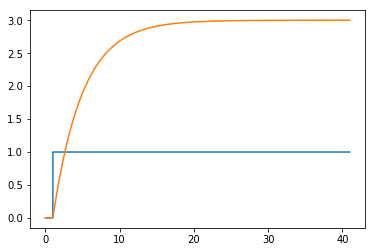

In [10]:
matplotlib.pyplot.plot(T2a, X, T2a, Y2a)

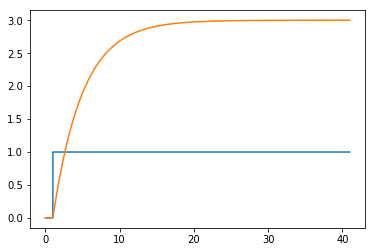

In [11]:
matplotlib.pyplot.plot(T2b, X, T2b, Y2b)

In [12]:
max(abs(Y1-Y2a))

NameError: name 'Y1' is not defined

In [13]:
max(abs(Y1-Y2b))

NameError: name 'Y1' is not defined

In [14]:
max(abs(Y2a-Y2b))

3.545113358427443e-08

### Part 2: Analyze Fake Data

In [15]:
def stepID1(T, X, Y):
    X_0 = X[0]
    X_final = X[-1]

    Y_0 = Y[0]
    Y_final = Y[-1]
    tau_est = list()

    K_est = (Y_final-Y_0) / (X_final - X_0)

    for i in range(1,4):
        Y_ = (1-np.exp(-i))*(Y_final-Y_0)
        idx1 = np.where(Y_>=Y1)[0][-1]
        idx2 = np.where(Y_<=Y1)[0][0]

        tau_est.append(T[idx1]/i)
        tau_est.append(T[idx2]/i)
    #print(tau_est)
    tau_est = np.mean(tau_est)

    return K_est, tau_est

In [16]:
stepID1(T, X, Y1)

NameError: name 'Y1' is not defined

In [17]:
T_, Y_, xout = signal.lsim(sys2, U=Y, T=T, X0=X[0])

NameError: name 'Y' is not defined

In [ ]:
plot = matplotlib.pyplot.plot

In [ ]:
cycles = 10 # Number of cycles to generate
f=2*10e-3 # Hz

T=np.arange(0,cycles/f,1e-2)
w = 2*np.pi*f
Y=np.sin(w*T)
T_, Y_, xout = signal.lsim(sys2, U=Y, T=T, X0=Y[0])
plot(T,Y,T_,Y_)

In [ ]:
t0=np.where(8/f<=T)[0][0]

In [ ]:
plot(T[t0:],Y[t0:],T_[t0:],Y_[t0:])

In [ ]:
from scipy.optimize import minimize, rosen, rosen_der

In [ ]:
np.sum((np.array([0,1,2])- np.array([0.5,1.5,0.5]))**2)

In [ ]:
def func(T, A, Phase):
    return A*np.sin(w*T+Phase)

import scipy.optimize as optimization

In [ ]:
x0 = [1, 0]

In [ ]:
xdata=T_[t0:]-T_[t0]
ydata=Y_[t0:]

In [ ]:
(Gain, Phase), B = optimization.curve_fit(func, xdata, ydata, x0)

In [ ]:
Gain

In [ ]:
Phase

In [ ]:
plot(xdata,ydata,xdata, func(xdata,A[0],A[1]))

In [ ]:
?control.matlab.bode

In [ ]:
?signal.bode

In [ ]:
f

In [ ]:
# w : 1D ndarray
#     Frequency array [rad/s]
# mag : 1D ndarray
#     Magnitude array [dB]
# phase : 1D ndarray
#     Phase array [deg]
w, mag, phase = signal.bode(sys2, w)

In [ ]:
mag

In [ ]:
20*np.log10(A[0])